# Titanic Data Analysis



This analysis is conducted as part of the Udacity data analysis nanodegree. Given the choice between analyzing baseball statistics and Titanic passenger statistics, I chose the Titanic statistics. Given the nature of the data, the obvious question to try and answer is:

__What factors influenced whether or not a given passenger survived?__

In [2]:
#Some imports
import numpy
import pandas as pd
import matplotlib
import seaborn

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/vlambert/anaconda/envs/py3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Data Cleaning

To start the data cleaning, we will read the data from the csv file. We also adjust the index to PassengerId to make the data easier to work with.



In [3]:
titanic_data_full = pd.read_csv('titanic-data.csv')

# Set the index to the PassengerId because it already is a convenient index
titanic_data_full.set_index('PassengerId', inplace = True)

# Print the head to make sure it worked
titanic_data_full.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looking at the output of head, the top five rows of the table, we can see the columns in the dataset. From the [Kaggle documentation](https://www.kaggle.com/c/titanic/data) of the data:

* Survived can have values of 0 for did not survive and 1 for survived
* Pclass can be 1, 2, or 3 which is a proxy for economic status. One is upper class, two is middle class, and three is lower class.

With these parameters in mind, there are three variables over which survival can easily be analyzed:
1. Age
2. Economic Status
3. Gender

First we will look at some basic statistics of the data, to see if there are any issues.

In [4]:
# Print descriptive statistics
titanic_data_full.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are a total of 891 entries in this segment of the table. However, there are only 714 entries for age. From these statistics, it seems that several passenger entries are missing their age. Looking more closely, these are just NaN and can be easily dropped when it comes time to analyze data with respect to age.

Here we can also see that only 38.3% of people survived the Titanic sinking. We can use that as a comparison to see which demographic groups had more or less than average survival.

Next we will create a basic table for use in analyzing survival rate depending on age. We will assign each passenger an age range using pandas 'cut' function, and use those age ranges for further analysis.

In [5]:
# Define a varible to use for bin creation for a variety of functions
by_ten = [x*10 for x in range(9)]

# Limit the table to only the relevant columns
titanic_age_wna = titanic_data_full[["Survived", "Age"]]

# Drop the N/A entries from the table, creating the age table we will use for our analysis
titanic_age = titanic_age_wna.dropna()

# Compute a different table for the use of age comparisons
# pd.cut creates an age range for each passenger which is useful for comparisons
titanic_age = titanic_age.assign(AgeRange = pd.cut(titanic_age['Age'], bins = by_ten).values)
# initially was getting a lot of 'savewithcopy' warnings by doing titanic_age['AgeRange'] =... 
# the assign function helps to mitigate this

titanic_age.head()

,Survived,Age,AgeRange
PassengerId,,,
1,0,22.0,"(20, 30]"
2,1,38.0,"(30, 40]"
3,1,26.0,"(20, 30]"
4,1,35.0,"(30, 40]"
5,0,35.0,"(30, 40]"


The table that was just created has each passenger, whether or not they survived, and their age range. N/A values were dropped to create a table with only passengers with valid age data. We can use this table to find some basic statistics on age and survival rate.

## Age Analysis

First we will create a histogram of the ages to confirm that there is a reasonable distribution of people.

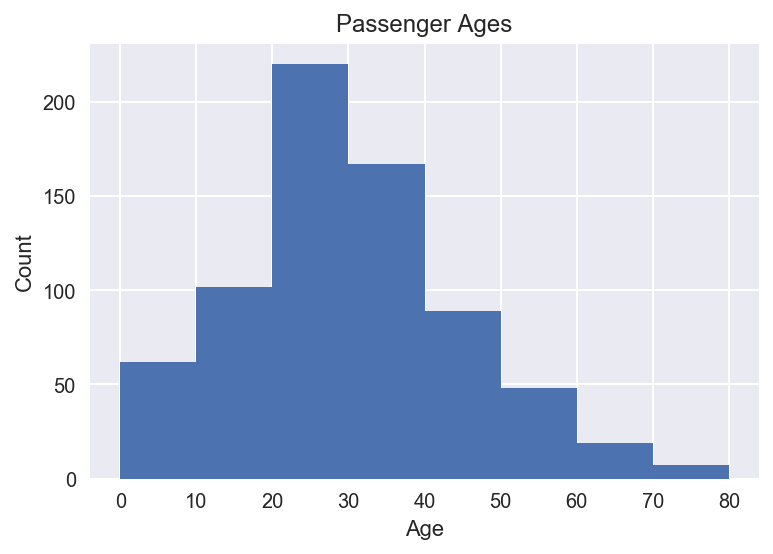

In [6]:
# Create a histogram of ages for initial demographics
ax = titanic_age['Age'].hist(bins = by_ten)

# Label the plot
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Passenger Ages')

Looking at the histogram, the 714 people with age data are approximately normally distributed. Looking at the descriptive statistics printed earlier, the mean age is about 30 years old. The sample size is very low for the much older people, > 60, it will be hard to draw statistically significant conclusions from that sample.

In [7]:
# Compute the percent of people who survive in each age group
survival_by_age = titanic_age.groupby(['AgeRange'])['Survived'].agg(['count', 'mean'])
survival_by_age

# note that the mean listed is the percent survival rate

,count,mean
AgeRange,,
"(0, 10]",64,0.593750
"(10, 20]",115,0.382609
"(20, 30]",230,0.365217
"(30, 40]",155,0.445161
"(40, 50]",86,0.383721
"(50, 60]",42,0.404762
"(60, 70]",17,0.235294
"(70, 80]",5,0.200000


Looking at the table, it seems that most age groups have a survival rate between 35 and 45 percent. We can create a plot of the survival rates to make it easier to understand. This table makes for an easy referenct to look up the number of people in each age group

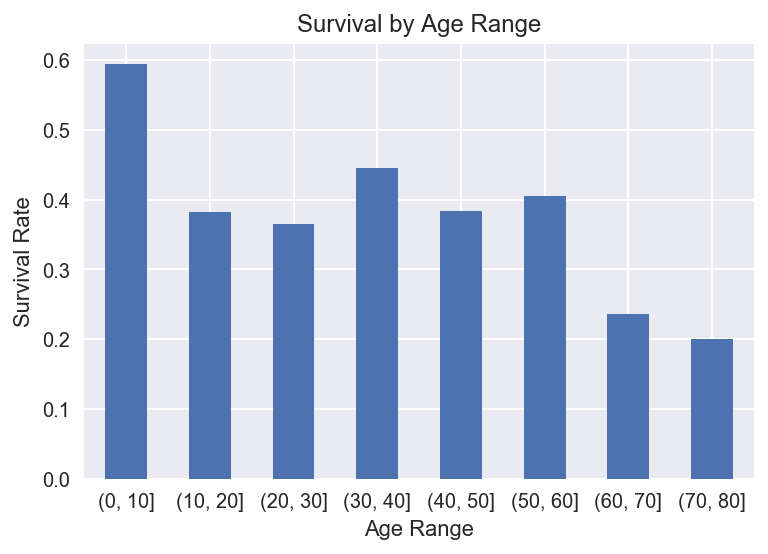

In [8]:
# Create a plot of survival rate versus age group
ax = survival_by_age['mean'].plot(kind = 'bar', rot = 0)

# Label the plot
ax.set_title('Survival by Age Range')
ax.set_xlabel('Age Range')
ax.set_ylabel('Survival Rate')

The data is much more clear when looking at the figure. Age groups from 10-20 all the way through 50-60 all have approximately the same survival rate of about 40 percent. Passengers who were older than 60 had a drastically lower survival rate, less than 35 percent.

The most interesting observation is that passengers less than 10 years old, children, had a much higher rate of survival. This could be a result of several factors, perhaps other passengers went out of their way to ensure the survival or children.


## Gender and Class Analysis

In addition to age, it is relatively easy to compare survival rates of different genders and economic class. First, let's take a look at the mean survival rate of each group overall.

In [9]:
# Compute basic survival rate by gender
titanic_data_full.groupby(['Sex'])['Survived'].agg(['count', 'mean'])

,count,mean
Sex,,
female,314,0.742038
male,577,0.188908


There is a clear divide here - almost 75% of female passengers survive and fewer than 20% of male passengers survive.

In [10]:
# Compute basic survival rate by class
titanic_data_full.groupby(['Pclass'])['Survived'].agg(['count', 'mean'])

,count,mean
Pclass,,
1,216,0.629630
2,184,0.472826
3,491,0.242363


Once again, there is a clear trend here. Higher class passengers are definitely much more likely to survive, 63% did. Lower class passengers were much less likely to survive, with a survival rate of 24%. Middle lass passengers were still better off than the average, with 47%. Next we will look at the survival rate of each sex and class simultaneously.

In [11]:
# Pclass and Gender comparison chart
class_and_sex = titanic_data_full.groupby(['Pclass', 'Sex'])['Survived']
class_and_sex.agg(['count', 'mean'])

count      mean
Pclass Sex                    
1      female     94  0.968085
       male      122  0.368852
2      female     76  0.921053
       male      108  0.157407
3      female    144  0.500000
       male      347  0.135447

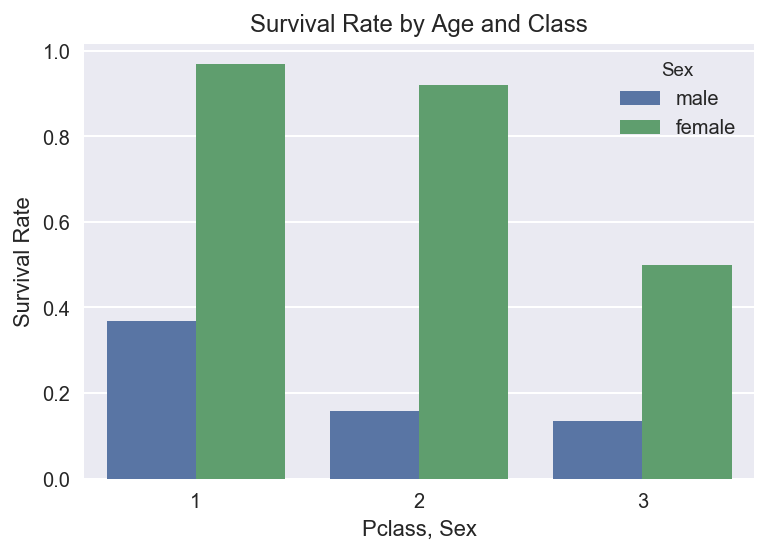

In [21]:
# Plot the survival rate of different classes and sexes
ax = seaborn.barplot(data = titanic_data_full, 
                     x = 'Pclass', 
                     y = 'Survived', 
                     hue = 'Sex',
                     ci = None)
# Label the plot
ax.set_title('Survival Rate by Age and Class')
ax.set_xlabel('Pclass, Sex')
ax.set_ylabel('Survival Rate')

In the above figure, plotted are passenger classes divided according to gender. The groups with the highest survival rate are frist and second class women, both with survival rates above 90%!. Although the basic class data suggests that being in third class greatly decreases survival change, third class women had a 50% survival chance. Males have much lower survival rates of 37%, 16%, and 14% for first second and third class respectively.

## Fare Analysis

Since passenger class correlates with survival, fare price likely correlates as well. We can investigate this easily using the dataset

In [65]:
fare_by_class = titanic_data_full.groupby(['Pclass'])['Fare']
fare_by_class.agg(['count', 'mean'])

,count,mean
Pclass,,
1,216,84.154687
2,184,20.662183
3,491,13.675550


First we print some basic statistics, confirming that passengers in higher classes did pay much higher fees.

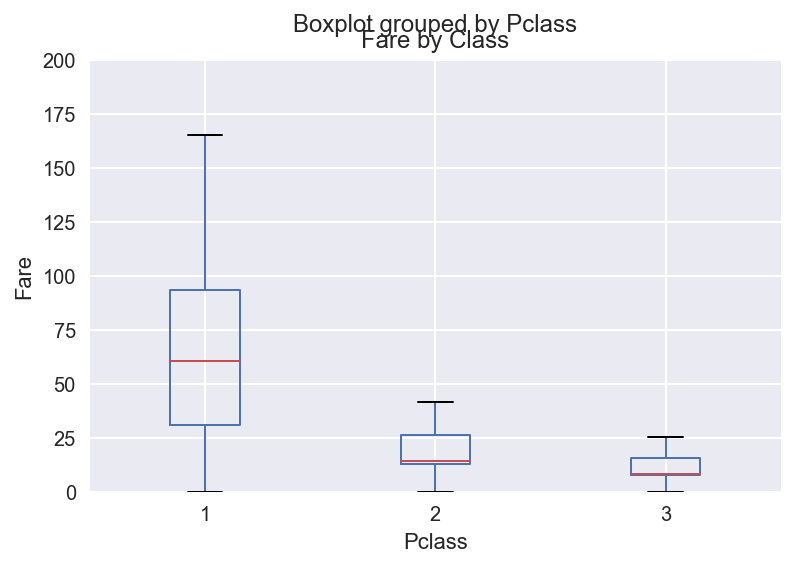

In [64]:
ax = titanic_data_full.boxplot(column = 'Fare', by = 'Pclass')

ax.set_ylim(0, 200)
ax.set_title('Fare by Class')
ax.set_ylabel('Fare')

The fare prices by passenger class are shown in this box plot. The second and third class have a narrower distribution than first class - which is four times as expensive on average!

In [79]:
# Calculate the correlation between fare price and survival rate
titanic_data_full[['Survived', 'Fare']].corr()

,Survived,Fare
Survived,1.000000,0.257307
Fare,0.257307,1.000000


Here we confirm that fare price is loosely correlated with survival by calculating the Pearson correlation coefficient. A value of 0.25 indicates that it is not a strong correlation, but the correlation exists. It is possible that this is just an effect of the passenger class influence on survival, rather than another predictive value.

## Conclusions

In this analysis of the titanic survival data, I investigated the different age groups, genders, and economic classes of passenger about the titanic. There were several limitations to the analysis. Only looking at the data, it is impossible to know the exact reason for these trends. It is possible that by combining this data with analysis of the design of the titanic and historical records that explanations could be proposed, but that is outside the scope of this analysis. Also, the sample size for passengers over age 60 was small, so conclusions drawn from that data may be inaccurate.

The most likely age groups to survive are women and children, perhaps a result of the male and adult passengers prioritizing their rescue. Passenger class also had a significant impact on the survival rate, with higher class passengers being more likely to live. It is possible that the actual location of the cabins affected who could make it off the ship.

### Sources

https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas
https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot

Extensive use of the [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)